In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from torchvision import datasets
from torchvision.transforms import ToTensor

In [82]:
class AutoEncoder(torch.nn.Module):
  def __init__(self, batch_shape, channels, rows, cols, latent_dim):
    super(AutoEncoder, self).__init__()
    self.history = []
    self.batch_shape  = batch_shape
    self.channels = channels
    self.rows = rows
    self.cols = cols
    self.latent_dim = latent_dim
    self.nb_inputs = self.rows * self.cols * self.channels

    conv_shape = 16
    nb_input_conv = 16 * self.rows * self.cols

    self.encoder = torch.nn.Sequential(
        torch.nn.Conv2d(self.channels, conv_shape, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.Flatten(),
        torch.nn.Linear(in_features=nb_input_conv, out_features=128),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=128, out_features=latent_dim),
        torch.nn.ReLU(),
    )

    self.decoder = torch.nn.Sequential(
        torch.nn.Linear(in_features=self.latent_dim, out_features=128),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=128, out_features=nb_input_conv),
        torch.nn.ReLU(),
        torch.nn.Unflatten(1, (16, self.rows, self.cols)),
        torch.nn.ConvTranspose2d(16, self.channels, kernel_size=3, stride=1, padding=1),
        torch.nn.Sigmoid()
    )

  def forward(self, x):
    encode = self.encoder(x)
    decode = self.decoder(encode)
    return decode

  def train_model(self, x_train, y_train, epochs=10, lr=0.001):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(self.parameters(), lr=lr)

    for epoch in range(epochs) :
      output = self.forward(x_train)
      loss = criterion(output, y_train)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      print(f"Epoch [{epoch+1}/epochs], Loss: {loss.item():.4f}")


In [4]:
train_data = datasets.FashionMNIST(
    root='train',
    download=True,
    train=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='train',
    download=True,
    train=False,
    transform=ToTensor()
)

train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

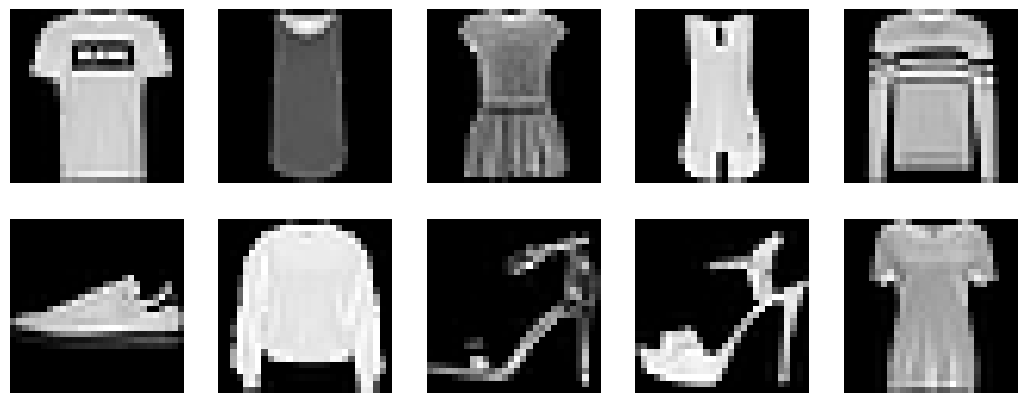

In [93]:
plt.figure(figsize=(13, 5))

for i in range(1, 11, 2):
  plt.subplot(2, 5, i)
  plt.imshow(train_data.data[i], cmap='gray')
  plt.axis("off")

  plt.subplot(2, 5, i+1)
  plt.imshow(train_data.data[i+1], cmap='gray')
  plt.axis("off")

In [15]:
samples = 10000
x_train = train_data.data.to(torch.float32)[:samples]
x_train = x_train.reshape((samples, rows, cols, channels))
print(f"x_train shape : {x_train.shape}")

samples_test = int(samples/4)
x_test = test_data.data.to(torch.float32)[:samples_test]
x_test = x_test.reshape((samples_test, rows, cols, channels))
print(f"x_test shape : {x_test.shape}")

x_train shape : torch.Size([10000, 28, 28, 1])
x_test shape : torch.Size([2500, 28, 28, 1])


In [38]:
x_train = x_train / 255.
x_test = x_test / 255.

In [84]:
latent_dim = 64
batch_shape = 1
nb_img = train_data.data.shape[0]
rows = train_data.data.shape[1]
cols = train_data.data.shape[2]
channels = 1

autoencoder = AutoEncoder(batch_shape, channels, rows, cols, latent_dim)
autoencoder

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=12544, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=64, bias=True)
    (6): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=12544, bias=True)
    (3): ReLU()
    (4): Unflatten(dim=1, unflattened_size=(16, 28, 28))
    (5): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Sigmoid()
  )
)

In [86]:
autoencoder.train()
autoencoder.train_model(x_train.permute(0, 3, 1, 2), x_train.permute(0, 3, 1, 2), epochs=100, lr=0.01)

Epoch [1/epochs], Loss: 0.1626
Epoch [2/epochs], Loss: 0.1769
Epoch [3/epochs], Loss: 0.1197
Epoch [4/epochs], Loss: 0.0970
Epoch [5/epochs], Loss: 0.0858
Epoch [6/epochs], Loss: 0.0754
Epoch [7/epochs], Loss: 0.0684
Epoch [8/epochs], Loss: 0.0711
Epoch [9/epochs], Loss: 0.0595
Epoch [10/epochs], Loss: 0.0573
Epoch [11/epochs], Loss: 0.0506
Epoch [12/epochs], Loss: 0.0500
Epoch [13/epochs], Loss: 0.0483
Epoch [14/epochs], Loss: 0.0466
Epoch [15/epochs], Loss: 0.0446
Epoch [16/epochs], Loss: 0.0433
Epoch [17/epochs], Loss: 0.0429
Epoch [18/epochs], Loss: 0.0421
Epoch [19/epochs], Loss: 0.0413
Epoch [20/epochs], Loss: 0.0407
Epoch [21/epochs], Loss: 0.0399
Epoch [22/epochs], Loss: 0.0394
Epoch [23/epochs], Loss: 0.0387
Epoch [24/epochs], Loss: 0.0380
Epoch [25/epochs], Loss: 0.0374
Epoch [26/epochs], Loss: 0.0367
Epoch [27/epochs], Loss: 0.0362
Epoch [28/epochs], Loss: 0.0358
Epoch [29/epochs], Loss: 0.0356
Epoch [30/epochs], Loss: 0.0344
Epoch [31/epochs], Loss: 0.0337
Epoch [32/epochs]

In [88]:
autoencoder.eval()

with torch.no_grad():
    decoded = autoencoder(x_test.permute(0, 3, 1, 2))

decoded = decoded.cpu().numpy()
decoded.shape

(2500, 1, 28, 28)

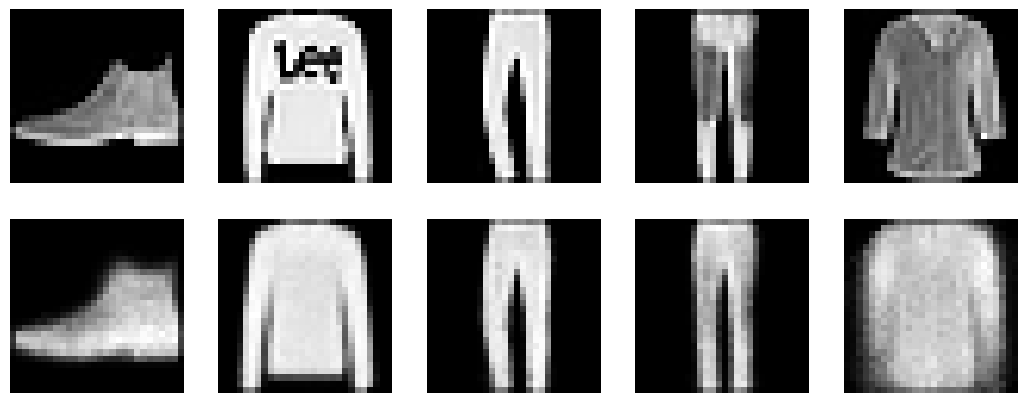

In [96]:
plt.figure(figsize=(13, 5))

for i in range(5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.axis("off")

for i in range(5):
  plt.subplot(2, 5, i+6)
  plt.imshow(decoded[i].reshape(28, 28), cmap='gray')
  plt.axis("off")